In [1]:
! pip install pandas
! pip install numpy
! pip install nltk
! pip install wordcloud
! pip install vader
! pip install matplotlib
! pip install cufflinks

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 991.0 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.9 MB/s eta 0:00:00
  Obtaining dependency information for vader from https://files.pythonhosted.org/packages/c9/32/56236e6aab0065fd4ac30a7b0f7ecbde4582cb3744c21e3f3844647f230b/vader-0.0.3-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/4.8 MB ? eta -:--:--
   - --------------------------

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ---------------------------------------- 81.7/81.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for colorlover>=0.2.1 from https://files.pythonhosted.org/packages/9a/53/f696e4480b1d1de3b1523991dea71cf417c8b19fe70c704da164f3f90972/colorlover-0.3.0-py3-none-any.whl.metadata
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=c0845d364cf1dd18a1164f5d6beda03284eee9847fa973d24eacefc2b6e65bab
  Stored in directory: c:\users\toluwalope ojuroye\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import nltk
import wordcloud

[nltk_data] Downloading package punkt to C:\Users\TOLUWALOPE
[nltk_data]     OJUROYE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\TOLUWALOPE
[nltk_data]     OJUROYE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\TOLUWALOPE
[nltk_data]     OJUROYE\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\TOLUWALOPE
[nltk_data]     OJUROYE\AppData\Roaming\nltk_data...


In [3]:
# Loading dataset
data = pd.read_csv('Twitter Product Sentiment Analysis.csv')

In [4]:
data.head()

,id,tweet
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,Finally a transparant silicon case ^^ Thanks t...
2,3,We love this! Would you go? #talk #makememorie...
3,4,I'm wired I know I'm George I was made that wa...
4,5,What amazing service! Apple won't even talk to...


In [5]:
data.shape

(9873, 2)

In [6]:
data.dtypes

id        int64
tweet    object
dtype: object

In [7]:
data.isnull().sum()

id       0
tweet    0
dtype: int64

In [8]:
# lemmatizing to get the root form of the word
import string, re
from nltk.stem import WordNetLemmatizer

In [9]:
#Data preprocessing
def clean_and_generate_new_tweet(rawtweet):
    new_tweet = rawtweet.lower().strip()
    new_tweet = new_tweet.translate(str.maketrans('', '', string.punctuation))
    new_tweet = re.sub(r'\d+', '', new_tweet)
    return new_tweet

data['Newtweet'] = data.tweet.apply(clean_and_generate_new_tweet)

In [10]:
#Removing stopwords
#Importing nltk
#nltk.download('stopwords')

In [11]:
#Tokenising and Removing Stop Words
stop_word_list = set(nltk.corpus.stopwords.words('english'))

def tokenise_and_stop_words_removal(Newtweet):
    stop_words_removed_tweet = list()
    tokenised_tweet = nltk.tokenize.word_tokenize(Newtweet)
    for word in tokenised_tweet:
        if word not in stop_word_list:
            stop_words_removed_tweet.append(word)
    newtweet = " ".join(stop_words_removed_tweet)
    return newtweet

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\TOLUWALOPE
[nltk_data]     OJUROYE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
data['StopRemovedtweet'] = data.Newtweet.apply(tokenise_and_stop_words_removal)

In [14]:
# Lemmatization
word_lemmatizer = WordNetLemmatizer()

def lemmatize_tweet(StopRemovedtweet):
    lemma_tweet = list()
    StopRemovedtweet = StopRemovedtweet.split()
    for word in StopRemovedtweet:
        lemma_word = word_lemmatizer.lemmatize(word)
        lemma_tweet.append(lemma_word)
    return " ".join(lemma_tweet)

In [15]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\TOLUWALOPE
[nltk_data]     OJUROYE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\TOLUWALOPE
[nltk_data]     OJUROYE\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
data['Cleantweet'] = data.StopRemovedtweet.apply(lemmatize_tweet)

In [17]:
data.head()

,id,tweet,Newtweet,StopRemovedtweet,Cleantweet
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test httpsgooglhmfqv and...,fingerprint pregnancy test httpsgooglhmfqv and...,fingerprint pregnancy test httpsgooglhmfqv and...
1,2,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to ...,finally transparant silicon case thanks uncle ...,finally transparant silicon case thanks uncle ...
2,3,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...,love would go talk makememories unplug relax i...,love would go talk makememories unplug relax i...
3,4,I'm wired I know I'm George I was made that wa...,im wired i know im george i was made that way ...,im wired know im george made way iphone cute d...,im wired know im george made way iphone cute d...
4,5,What amazing service! Apple won't even talk to...,what amazing service apple wont even talk to m...,amazing service apple wont even talk question ...,amazing service apple wont even talk question ...


In [18]:
#Joining words together
fullTextFromtweetList = list((data['Cleantweet'].values))
fullTextFromtweet = ",".join(fullTextFromtweetList)

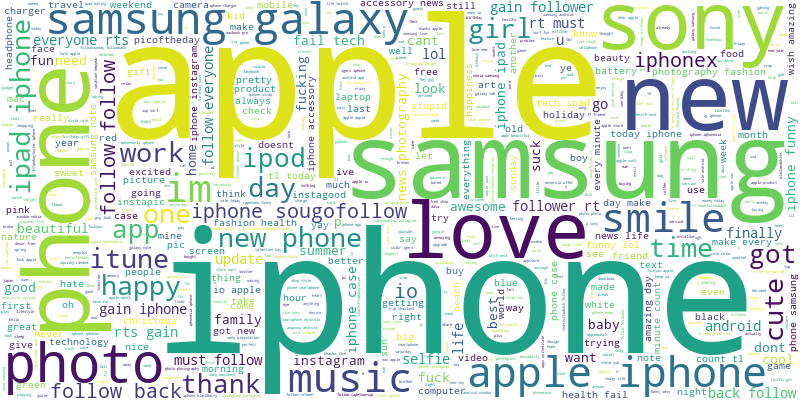

In [19]:
wordCloudObject = wordcloud.WordCloud(max_words=2000, width= 800, height = 400)
wordCloudObject.generate(fullTextFromtweet).background_color="white"
wordCloudObject.to_image()

In [20]:
# Plotting UniGrams After Text Cleaning

text_list = data['Cleantweet'].tolist()
split_text_list = list()
for word in text_list:
    split_text_list.append(word.split(' '))

unigram_words = list()

for sub in split_text_list:
    for s in sub:
        unigram_words.append(s)

In [21]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [22]:
#plotting 15 unique words used in the tweets using a unigram

# PLotting Unigrams (one word)
uniDf = pd.Series(nltk.ngrams(unigram_words, 1)).value_counts().to_frame().reset_index()
uniDf.columns = ['word','count']
uniDf['word'] = uniDf.word.apply(lambda x: x[0])
uniDf.head(15).iplot(kind='bar', x='word', y='count', yTitle='Count', title='Top 15 Frequent words in tweets')